<a href="https://colab.research.google.com/github/wcj365/college-scorecard/blob/master/6-value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# College Scorecard Data Exploration
## Part Six - Value Comparison  
There can be many ways to define the value a college provides. Here, for similicity, we define value as the ratio of earning potential over tution. We attempt to compare between public and private institutions.


## Step 1 - Import Relevant Python Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns
import altair as alt               

## Step 2 - Download Data and Save to Local Drive
Since this notebook is created and run in Google Colab, we use the content folder mounted to the VM running the notebook. Since the VM is not permanent, each time, we open this notebook in Colab, we need to download the data from College Scorecard website.

In [4]:
# This is another way to download data - using Linux commands in bash shell.

%%bash
export FILE_PATH="https://ed-public-download.app.cloud.gov/downloads/"
export FILE_NAME="Most-Recent-Cohorts-All-Data-Elements.csv"
curl $FILE_PATH$FILE_NAME > ./$FILE_NAME
ls -al

total 150076
drwxr-xr-x 1 root root      4096 Mar  7 19:46 .
drwxr-xr-x 1 root root      4096 Mar  7 19:38 ..
drwxr-xr-x 1 root root      4096 Mar  3 18:11 .config
-rw-r--r-- 1 root root 153660508 Mar  7 19:46 Most-Recent-Cohorts-All-Data-Elements.csv
drwxr-xr-x 1 root root      4096 Mar  3 18:11 sample_data


## Load the Data into Pandas Dataframe

In [40]:
COLUMNS_OF_INTEREST = ['UNITID', 'CONTROL', 'INSTNM', 'CITY', 'STABBR',"REGION", "MD_EARN_WNE_P6","TUITIONFEE_IN"]
FILE_NAME = "Most-Recent-Cohorts-All-Data-Elements.csv"

df = pd.read_csv(FILE_NAME, usecols = COLUMNS_OF_INTEREST)
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 8 columns):
UNITID            7112 non-null int64
INSTNM            7112 non-null object
CITY              7112 non-null object
STABBR            7112 non-null object
CONTROL           7112 non-null int64
REGION            7112 non-null int64
TUITIONFEE_IN     4021 non-null float64
MD_EARN_WNE_P6    5887 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 444.6+ KB


In [8]:
df.sample(5)

,UNITID,INSTNM,CITY,STABBR,REGION,TUITIONFEE_IN,MD_EARN_WNE_P6
2821,206914,Cameron University,Lawton,OK,6,6180.0,27000
6447,486983,Paul Mitchell the School-Madison,Madison,WI,3,NaN,NaN
3189,217156,Brown University,Providence,RI,1,53419.0,52500
3151,216162,St Lukes Hospital School of Nursing,Bethlehem,PA,2,NaN,56700
1302,156471,Galen College of Nursing-Louisville,Louisville,KY,5,NaN,42200


## Step 4 - Cleanse Data

In [41]:
# notice from the output of info(), MD_EARN_WNE_P6 is of type object.
# it Should be numerical. There is issue with the column.
# drop rows that have "PrivacySuppressed" in th earnings.

df = df[df['MD_EARN_WNE_P6'] != "PrivacySuppressed"] 

df.shape

(6583, 8)

In [0]:
# Convert the earnings from categorical to numeric type

df['MD_EARN_WNE_P6'] = df['MD_EARN_WNE_P6'].astype(float)


In [43]:
# drop all rows that have missing values

df.dropna(inplace=True)
df.shape

(3577, 8)

In [44]:
# Drop the rows that has 0 tution or 0 earnings

df = df[df['TUITIONFEE_IN'] > 0]
df = df[df['MD_EARN_WNE_P6'] > 0]
df.shape

(3577, 8)

In [45]:
# Calculate VALUE and add it to the data frame

df["VALUE"] = round(df['TUITIONFEE_IN'] / df['MD_EARN_WNE_P6'], 2)
df["VALUE"].sample(5)

2392    0.18
1995    0.89
5667    1.04
6812    0.55
1971    0.18
Name: VALUE, dtype: float64

In [46]:
# Calculate descriptive statistics

df["VALUE"].describe()

count    3577.000000
mean        0.489279
std         0.369040
min         0.020000
25%         0.190000
50%         0.390000
75%         0.740000
max         2.840000
Name: VALUE, dtype: float64

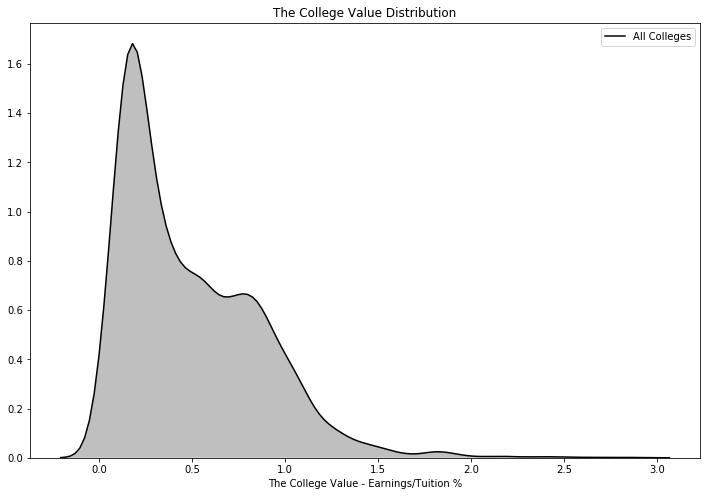

In [53]:
fig,ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(df["VALUE"],shade=True,color="black",label="All Colleges")
ax.set_title("The College Value Distribution")
ax.set_xlabel("The College Value - Earnings/Tuition %")
plt.show()

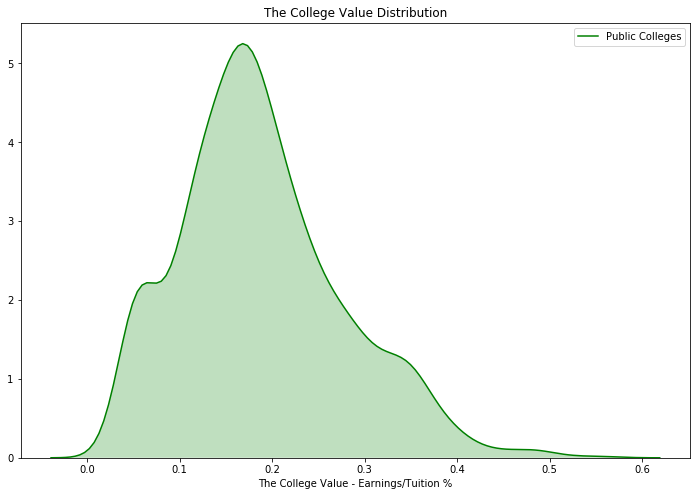

In [50]:
public = df[df["CONTROL"] == 1]
fig,ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(public["VALUE"],shade=True,color="green",label="Public Colleges")
ax.set_title("The College Value Distribution")
ax.set_xlabel("The College Value - Earnings/Tuition %")
plt.show()

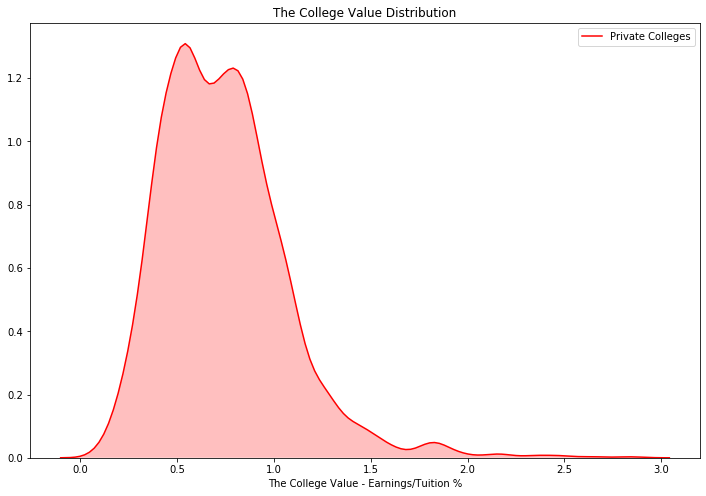

In [52]:
public = df[df["CONTROL"] != 1]
fig,ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(public["VALUE"],shade=True,color="red",label="Private Colleges")
ax.set_title("The College Value Distribution")
ax.set_xlabel("The College Value - Earnings/Tuition %")
plt.show()

In [0]:
ax = sns.kdeplot(df1["DiffMeanHourlyPercent"],shade=True,color="blue",label="All Companies")
plt.xlim([-75,75])
ax.set_title("Differences in Mean Hourly Pay, Electricity Sector and All Companies")
ax.set_xlabel("Difference % (DiffMeanHourlyPercent)")
plt.legend()

## The Region Mapping

-    0: "U.S. Service Schools",
-    1: "New England (CT, ME, MA, NH, RI, VT)",
-    2: "Mid East (DE, DC, MD, NJ, NY, PA)",
-    3: "Great Lakes (IL, IN, MI, OH, WI)",
-    4: "Plains (IA, KS, MN, MO, NE, ND, SD)",
-    5: "Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)",
-    6: "Southwest (AZ, NM, OK, TX)",
-    7: "Rocky Mountains (CO, ID, MT, UT, WY)",
-    8: "Far West (AK, CA, HI, NV, OR, WA)",
-    9: "Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)"


In [0]:
REGION_DICT = {
    0: "U.S. Service Schools",
    1: "New England",
    2: "Mid East",
    3: "Great Lakes",
    4: "Plains",
    5: "Southeast",
    6: "Southwest",
    7: "Rocky Mountains",
    8: "Far West",
    9: "Outlying Areas"
}

grouped["REGION"].replace(to_replace=REGION_DICT, inplace=True)

grouped.sample(10)

,STABBR,PAR_ED_PCT_1STGEN,MD_EARN_WNE_P6,REGION
20,KY,0.49,24.0,Southeast
38,NY,0.41,33.0,Mid East
43,PR,0.46,15.0,Outlying Areas
35,NJ,0.51,29.0,Mid East
8,DC,0.43,34.0,Mid East
16,ID,0.45,25.0,Rocky Mountains
19,KS,0.41,30.0,Plains
11,FM,0.47,16.0,Outlying Areas
7,CT,0.46,34.0,New England
23,MD,0.45,30.0,Mid East
